In [239]:
import pandas as pd
import statistics
# cpu_times = pd.read_csv('cpu_times.csv')
# cpu_times

In [240]:
cpu_times = pd.read_csv('cpu_times.csv')
cpu_times

,number of aircraft,average cpu time,cpu variance,cost of replanning,num replannings
0,20.0,0.052407,0.047898,21.0,26.0
1,20.0,0.017803,0.000236,29.0,21.0
2,20.0,0.013481,0.000367,24.0,20.0
3,20.0,0.032354,0.004878,36.0,21.0
4,20.0,0.019633,0.001066,11.0,15.0
...,...,...,...,...,...
110,12.0,0.005961,0.000054,10.0,17.0
111,12.0,0.003427,0.000024,4.0,16.0
112,12.0,0.005030,0.000063,7.0,12.0
113,12.0,0.009287,0.000286,1.0,11.0


In [241]:
# find the average of all the average cpu times where number of aircraft is 5
num_aircraft = 6
average_average_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['average cpu time'].mean()
average_variance_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cpu variance'].mean()
average_cost_of_replanning = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
average_number_of_plans = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['num replannings'].mean()

(0.0033461610034659405, 1.2392311973149455e-05, 0.8, 7.466666666666667)

In [242]:
# *** INIT *** 
final_df = pd.DataFrame([[6, average_average_cpu_time, average_variance_cpu_time,  average_cost_of_replanning, average_number_of_plans]], columns=['number of aircraft', 'average cpu time', 'variance', 'cost of replanning', 'number of replannings'])
final_df

,number of aircraft,average cpu time,variance,cost of replanning,number of replannings
0,6,0.003346,0.000012,0.8,7.466667


In [243]:
for i in range(6, 21, 2):
    num_aircraft = i
    average_average_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['average cpu time'].mean()
    average_variance_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cpu variance'].mean()
    average_cost_of_replanning = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
    average_number_of_plans = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['num replannings'].mean()

    final_df.loc[-1] = [num_aircraft, average_average_cpu_time, average_variance_cpu_time, average_cost_of_replanning, average_number_of_plans]   # adding a row
    final_df.index = final_df.index + 1                       # set the index
    final_df = final_df.sort_index()                          # sort the index


In [244]:
final_df

,number of aircraft,average cpu time,variance,cost of replanning,number of replannings
0,20.0,0.019864,0.005632,24.400000,21.100000
1,18.0,0.012055,0.000841,10.733333,18.333333
2,16.0,0.008406,0.000296,8.866667,17.533333
3,14.0,0.006548,0.000078,10.400000,15.866667
4,12.0,0.005616,0.000078,4.200000,14.733333
5,10.0,0.005504,0.000063,4.466667,12.333333
6,8.0,0.003860,0.000012,1.466667,10.000000
7,6.0,0.003346,0.000012,0.800000,7.466667
8,6.0,0.003346,0.000012,0.800000,7.466667


In [245]:
# remove the last row in final_df
final_df = final_df.drop(final_df.index[-1])
final_df

,number of aircraft,average cpu time,variance,cost of replanning,number of replannings
0,20.0,0.019864,0.005632,24.400000,21.100000
1,18.0,0.012055,0.000841,10.733333,18.333333
2,16.0,0.008406,0.000296,8.866667,17.533333
3,14.0,0.006548,0.000078,10.400000,15.866667
4,12.0,0.005616,0.000078,4.200000,14.733333
5,10.0,0.005504,0.000063,4.466667,12.333333
6,8.0,0.003860,0.000012,1.466667,10.000000
7,6.0,0.003346,0.000012,0.800000,7.466667


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


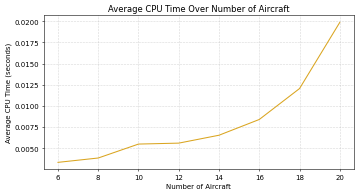

In [478]:
import matplotlib.pyplot as plt

# plot the average cpu time over number of aircraft
plt.figure(figsize=(8,4), dpi=50)
plt.plot(final_df['number of aircraft'], final_df['average cpu time'], color='goldenrod')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average CPU Time (seconds)')
plt.title('Average CPU Time Over Number of Aircraft')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('avg_cpu_time.eps', format='eps')
plt.savefig('avg_cpu_time.pdf', format='pdf')

plt.show()

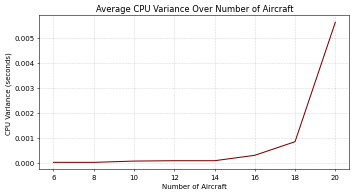

In [479]:
plt.figure(figsize=(8,4), dpi=50)
plt.plot(final_df['number of aircraft'], final_df['variance'], color='maroon', label='Variance')
plt.xlabel('Number of Aircraft')
plt.ylabel('CPU Variance (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Average CPU Variance Over Number of Aircraft')
plt.show()

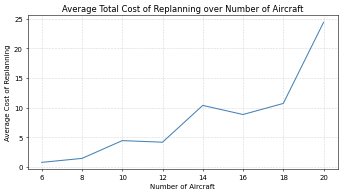

In [480]:
# plot the average cost of replanning over number of aircraft
plt.figure(figsize=(8,4), dpi=50)
plt.plot(final_df['number of aircraft'], final_df['cost of replanning'], color='steelblue', linewidth=1.5)
plt.xlabel('Number of Aircraft')
plt.ylabel('Average Cost of Replanning')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Average Total Cost of Replanning over Number of Aircraft')
plt.show()

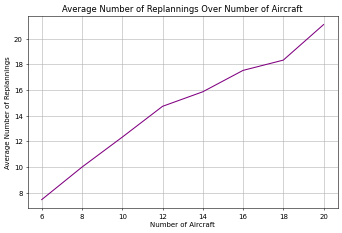

In [481]:
# plot the average number of replannings over number of aircraft
plt.figure(figsize=(8,5), dpi=50)
plt.plot(final_df['number of aircraft'], final_df['number of replannings'], color='purple')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average Number of Replannings')
plt.grid(True)
plt.title('Average Number of Replannings Over Number of Aircraft')
plt.show()

In [598]:
cpu_times_no_dev = pd.read_csv('cpu_times_no_dev.csv')

num_aircraft = 6
average_average_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['average cpu time'].mean()
average_variance_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cpu variance'].mean()
average_cost_of_replanning = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
average_number_of_plans = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['num replannings'].mean()
average_average_cpu_time, average_variance_cpu_time, average_cost_of_replanning, average_number_of_plans

# *** INIT *** 
final_df_no_dev = pd.DataFrame([[6, average_average_cpu_time, average_variance_cpu_time,  average_cost_of_replanning, average_number_of_plans]], columns=['number of aircraft', 'average cpu time', 'variance', 'cost of replanning', 'number of replannings'])
for i in range(6, 21, 2):
    num_aircraft = i
    average_average_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['average cpu time'].mean()
    average_variance_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cpu variance'].mean()
    average_cost_of_replanning = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
    average_number_of_plans = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['num replannings'].mean()

    final_df_no_dev.loc[-1] = [num_aircraft, average_average_cpu_time, average_variance_cpu_time, average_cost_of_replanning, average_number_of_plans]   # adding a row
    final_df_no_dev.index = final_df_no_dev.index + 1                       # set the index
    final_df_no_dev = final_df_no_dev.sort_index()                          # sort the index

    # remove the last row in final_df_no_dev
final_df_no_dev = final_df_no_dev.drop(final_df_no_dev.index[-1])

final_df_no_dev



,number of aircraft,average cpu time,variance,cost of replanning,number of replannings
0,20.0,0.024108,0.010298,15.187500,12.875000
1,18.0,0.016185,0.001308,9.533333,12.800000
2,16.0,0.010705,0.000223,6.133333,11.733333
3,14.0,0.009368,0.000252,4.000000,10.333333
4,12.0,0.009011,0.000165,4.600000,9.400000
5,10.0,0.007424,0.000072,3.142857,8.071429
6,8.0,0.006630,0.000071,1.733333,6.866667
7,6.0,0.005149,0.000023,0.933333,5.333333


In [753]:
import numpy as np
from scipy import stats


# cpu_times.head(), cpu_times_no_dev.head()

# groups

# for i in range(6,21,2):
    
# print(f'Number of Aircraft: {i}')

#
cor_no_dev = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] >= 14]['cost of replanning']
cor_dev = cpu_times[cpu_times['number of aircraft'] >= 14]['cost of replanning']

t_stat, p_value = stats.ttest_ind(cor_dev, cor_no_dev, equal_var=False)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

alpha = 0.05 # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")
# print('\n')

T-Statistic: 2.331743819039784
P-Value: 0.021639219511883703
Reject the null hypothesis. There is a significant difference between the two groups.


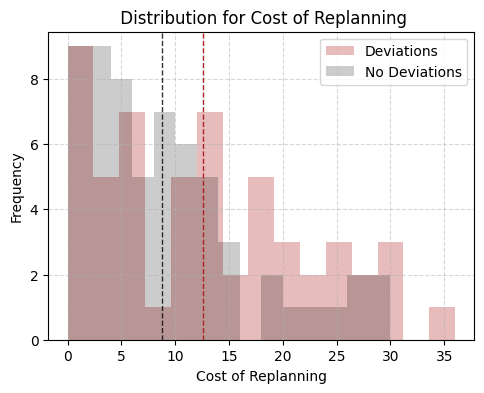

In [750]:
cor_no_dev = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] >= 14]['cost of replanning']
cor_dev = cpu_times[cpu_times['number of aircraft'] >= 14]['cost of replanning']

mean_value_dev = cor_dev.mean()
mean_value_no_dev = cor_no_dev.mean()

# plot to see if the two groups are normally distributed
plt.figure(figsize=(5.5,4), dpi=100)
plt.hist(cor_dev, bins=15, alpha=0.3, label='Deviations', color='firebrick')
plt.hist(cor_no_dev, bins=15, alpha=0.2, label='No Deviations', color='black')
plt.axvline(x=mean_value_dev, color='firebrick', linestyle='--', linewidth=1)
plt.axvline(x=mean_value_no_dev, color='black', linestyle='--', linewidth=1, alpha=0.8)
plt.legend(loc='upper right')
plt.xlabel('Cost of Replanning')
plt.ylabel('Frequency')
plt.title(' Distribution for Cost of Replanning')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('cost_of_replanning_distribution.pdf', format='pdf')

plt.show()


In [751]:
# The data for the cost of replanning is not normally distributed. Therefore I will be using a 
# non-parametric test (Mann-Whitney U Test) to compare the two groups.

# log transformation
cor_dev_log = np.log(cor_dev)
cor_no_dev_log = np.log(cor_no_dev)

# U-Test
u_stat, p_value_non_param = stats.mannwhitneyu(cor_dev_log, cor_no_dev_log)
print(f'U-Statistic: {u_stat}')
print(f'P-Value (non-parametric): {p_value_non_param}')

alpha = 0.05 # significance level
if p_value_non_param < alpha:
    print("Reject the null hypothesis. There is a SIGNIFICANT DIFFERENCE between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is NO SIGNIFICANT DIFFERENCE between the two groups.")


U-Statistic: 2061.5
P-Value (non-parametric): 0.03374389593554869
Reject the null hypothesis. There is a SIGNIFICANT DIFFERENCE between the two groups.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


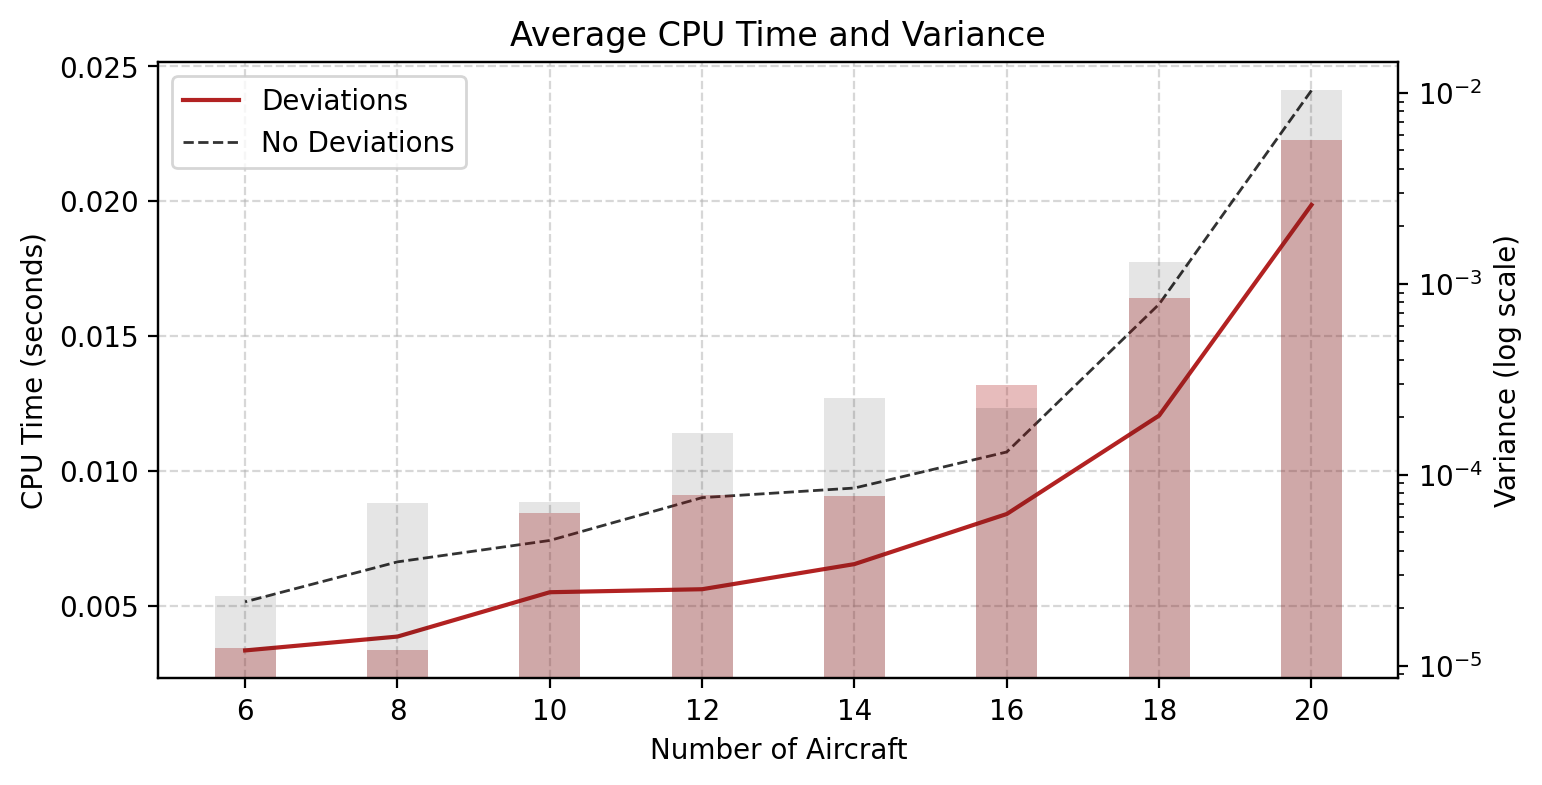

In [752]:
fig, ax1 = plt.subplots(figsize=(8,4), dpi=200)
ax1.plot(final_df['number of aircraft'], final_df['average cpu time'], color='firebrick', label='Deviations')
ax1.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['average cpu time'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
ax1.set_xlabel('Number of Aircraft')
ax1.set_ylabel('CPU Time (seconds)')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title('Average CPU Time and Variance')
ax1.legend()

ax2 = ax1.twinx()
ax2.set_yscale('log')
ax2.bar(final_df['number of aircraft'], final_df['variance'], color='firebrick', alpha=0.3)
ax2.bar(final_df_no_dev['number of aircraft'], final_df_no_dev['variance'], color='black', alpha=0.1)
ax2.set_ylabel('Variance (log scale)')
plt.savefig('CPU_time_and_variance.pdf', format='pdf')

plt.show()

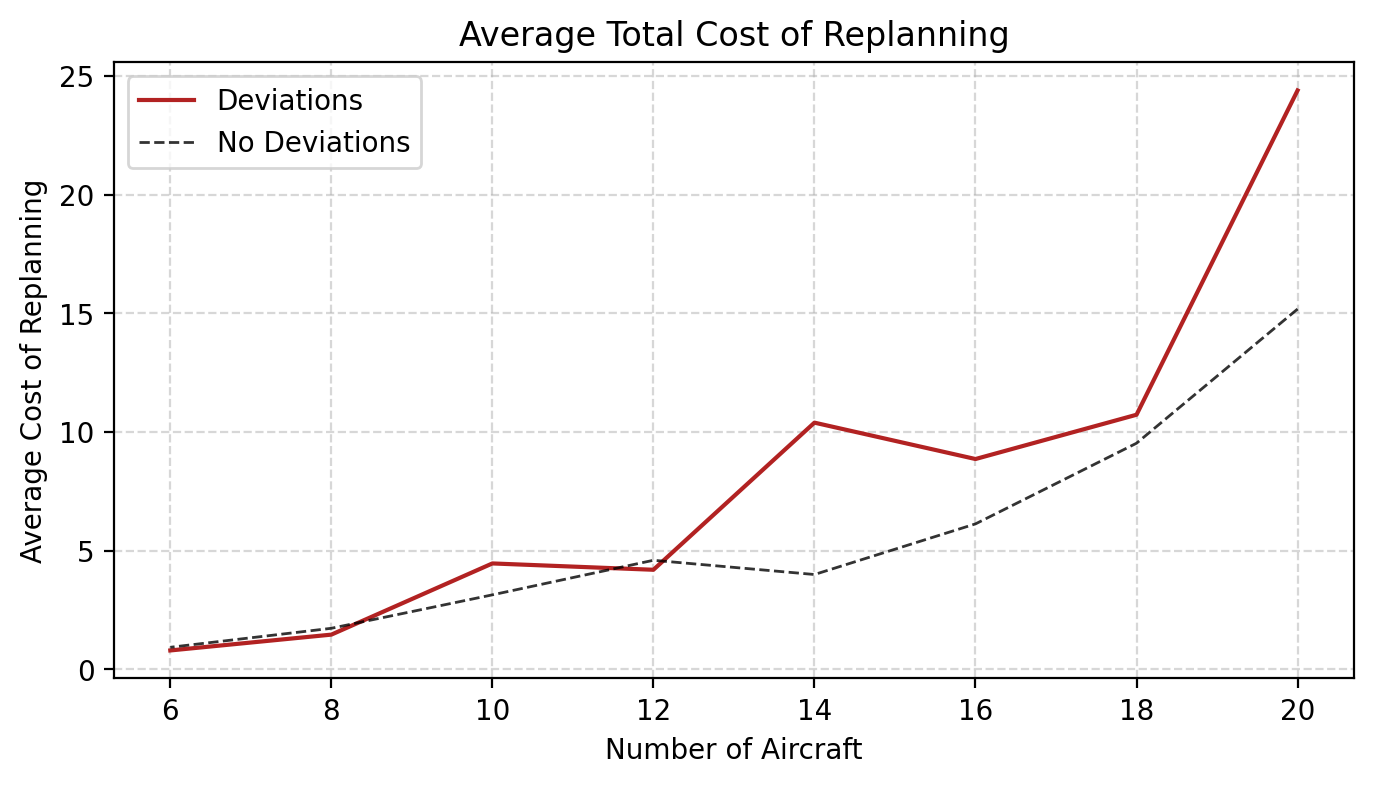

In [739]:
plt.figure(figsize=(8,4), dpi=200)
plt.plot(final_df['number of aircraft'], final_df['cost of replanning'], color='firebrick', label='Deviations')
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['cost of replanning'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average Cost of Replanning')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Average Total Cost of Replanning')
plt.legend()
plt.savefig('avg_cost_of_replanning.pdf', format='pdf')

plt.show()

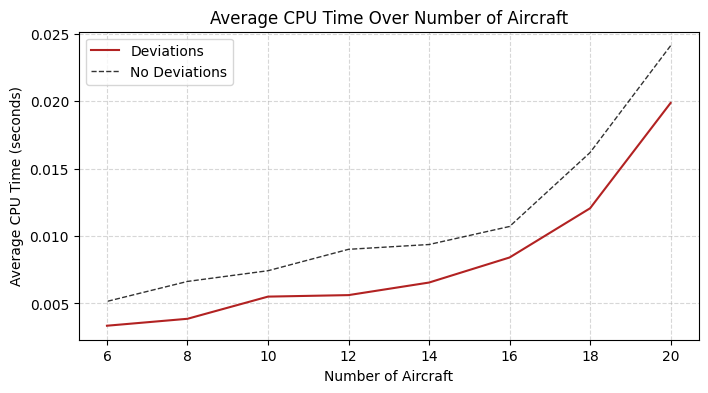

In [737]:
# plot the average cpu time over number of aircraft
plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df['number of aircraft'], final_df['average cpu time'], color='firebrick', label='Deviations')
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['average cpu time'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average CPU Time (seconds)')
plt.title('Average CPU Time Over Number of Aircraft')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('avg_cpu_time_no_dev.pdf', format='pdf')

plt.show()

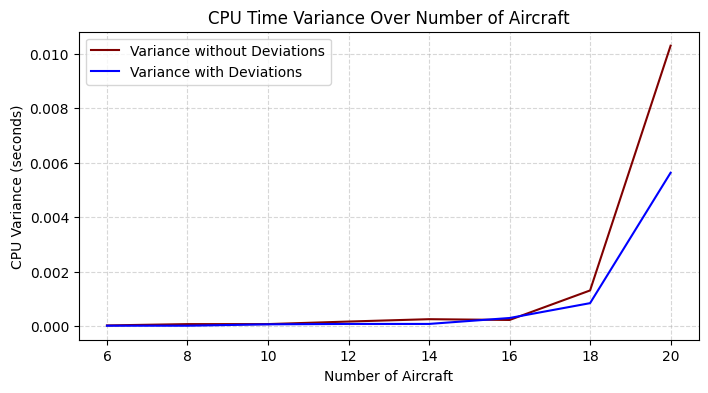

In [600]:

plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['variance'], color='maroon', label='Variance without Deviations')
plt.plot(final_df['number of aircraft'], final_df['variance'], color='blue', label='Variance with Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('CPU Variance (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('CPU Time Variance Over Number of Aircraft')
plt.legend()
plt.show()


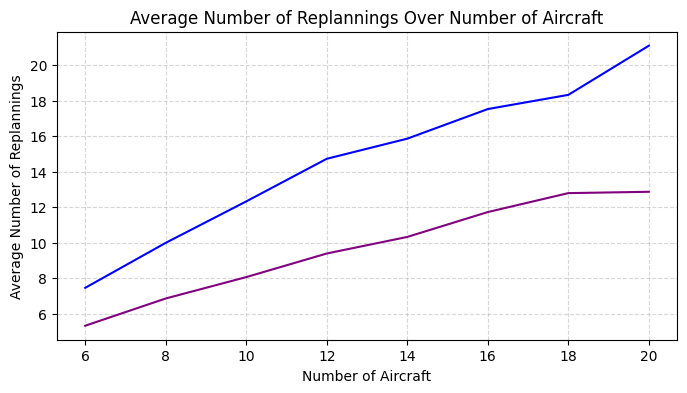

In [602]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['number of replannings'], color='purple')
plt.plot(final_df['number of aircraft'], final_df['number of replannings'], color='blue')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average Number of Replannings')
plt.grid(True, linestyle="--", alpha=0.5)
plt.title('Average Number of Replannings Over Number of Aircraft')
plt.show()

In [756]:
tally1 = 0

for i in range(6, 21, 2):
    tally1 += i * 15

tally2 = 0

for i in range(6, 21, 2):
    tally2 += i * 2 * 15


print("Maximum number of plannings with deviations: ", tally2)
print("Maximum number of plannings without deviations: ", tally1)

Maximum number of plannings with deviations:  3120
Maximum number of plannings without deviations:  1560
